In [1]:
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
df = pd.read_csv('kc_house_data_clean.csv')

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Not Available,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,Not Available,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
i = df.loc[df['bedrooms'] >30].index
df.drop(i, inplace=True)

In [8]:
df.bedrooms.astype('category')

0        3
1        3
2        2
3        4
4        3
        ..
21529    3
21530    4
21531    2
21532    3
21533    2
Name: bedrooms, Length: 21533, dtype: category
Categories (11, int64): [1, 2, 3, 4, ..., 8, 9, 10, 11]

In [13]:
bed =pd.get_dummies(df['bedrooms'], prefix= 'bedrooms' , drop_first=False)

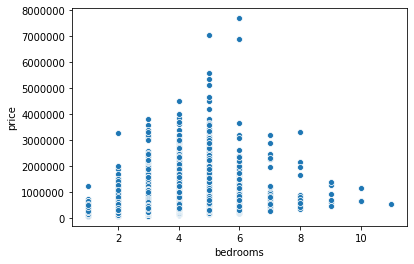

In [10]:
sns.scatterplot(df['bedrooms'], df['price']);

In [15]:
bed['price']= df['price']

In [ ]:
i = df.loc[df['bedrooms'] > 30].index
df.drop(i, inplace=True)

In [27]:
bedroom_1 = 'bedroom_1'

In [31]:
bedroom_1[8]

'1'

In [37]:
bed.head()

,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,price,1-3_bedrooms
0,0,0,1,0,0,0,0,0,0,0,0,221900.0,1
1,0,0,1,0,0,0,0,0,0,0,0,538000.0,1
2,0,1,0,0,0,0,0,0,0,0,0,180000.0,1
3,0,0,0,1,0,0,0,0,0,0,0,604000.0,0
4,0,0,1,0,0,0,0,0,0,0,0,510000.0,1


In [44]:
bed['4-6_bedrooms'] = bed['bedrooms_4'] + bed['bedrooms_5'] +bed['bedrooms_6']
bed.drop(['bedrooms_1','bedrooms_2','bedrooms_3','bedrooms_4','bedrooms_5','bedrooms_6'],axis=1, inplace=True)

In [46]:
bed['7-9_bedrooms'] = bed['bedrooms_7'] + bed['bedrooms_8'] +bed['bedrooms_9']
bed.drop(['bedrooms_7','bedrooms_8','bedrooms_9'],axis=1, inplace=True)

KeyError: 'bedrooms_7'

In [48]:
bed['10-11_bedrooms'] = bed['bedrooms_10'] + bed['bedrooms_11']
bed.drop(['bedrooms_10', 'bedrooms_11'], axis =1, inplace=True)

In [67]:
bed = bed.rename(columns = {'3_bedrooms':'3bedrooms',
                            '6_bedrooms':'6bedrooms', 
                            '9_bedrooms':'9bedrooms', 
                            '11_bedrooms':'11bedrooms'})

In [68]:
bed.head()

,price,3bedrooms,6bedrooms,9bedrooms,11bedrooms
0,221900.0,1,0,0,0
1,538000.0,1,0,0,0
2,180000.0,1,0,0,0
3,604000.0,0,1,0,0
4,510000.0,1,0,0,0


In [69]:
predictors = bed.drop(['price'], axis = 1)
outcome = 'price'
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [72]:
formula

'price~3bedrooms+6bedrooms+9bedrooms+11bedrooms'

In [71]:
model = ols(formula=formula, data=bed).fit()
model.summary()

SyntaxError: invalid syntax (<unknown>, line 1)